# Experimental Design

## 1. Choosing an Hypothesis Test

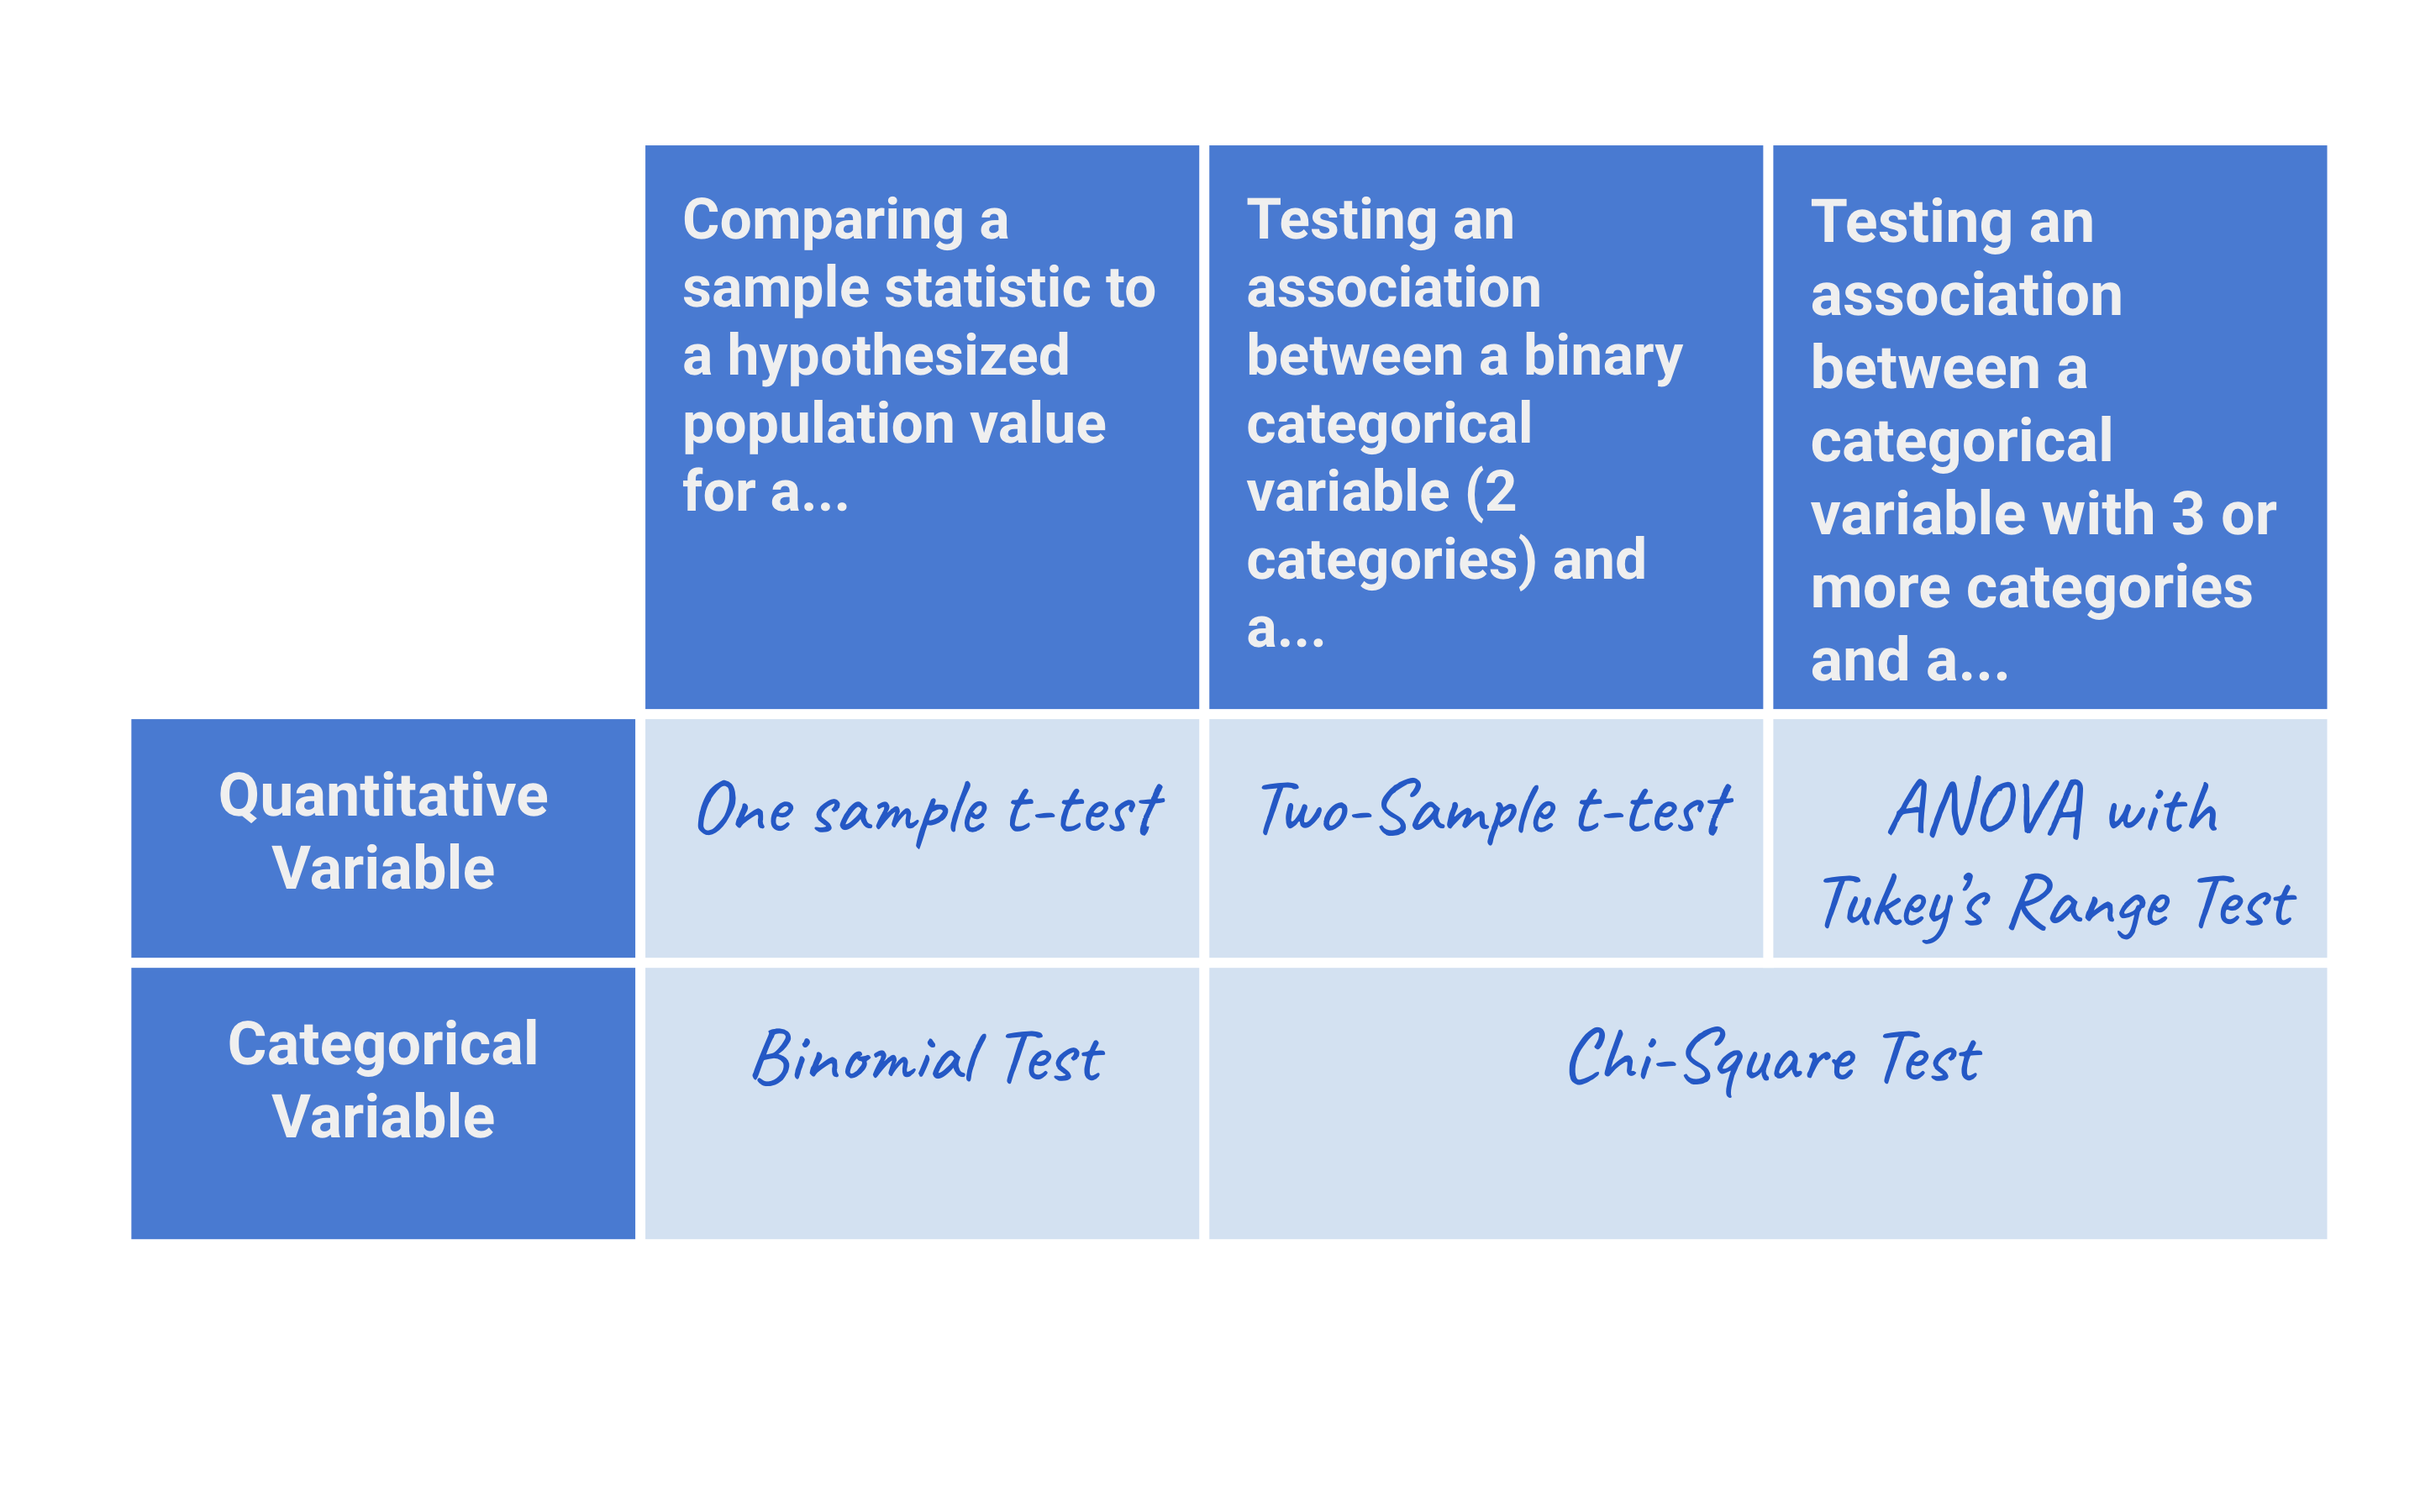

In [2]:
from IPython.display import Image
Image("Experimental Design/choice of test.png")

# A/B Testing __ A two sample , A and B, hypothesis test

#### A/B Test Simulation

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [44]:
A_rate = 0.5
B_rate = 0.7

# Data simulation
# np.random.seed(123) # defining a seed for reproducibility
clicks_A = np.random.choice(['yes','no'], size = 100, p = [A_rate, 1 - A_rate])

clicks_B = np.random.choice(['yes','no'], size = 100, p = [B_rate, 1 - B_rate])

outcome = list(clicks_A) + list(clicks_B)
group = ['A'] * 100 + ['B'] * 100
data = pd.DataFrame({'Group': group, 'Clicked': outcome,})
print(pd.crosstab(data.Group, data.Clicked))

Clicked  no  yes
Group           
A        55   45
B        31   69


In [45]:
ab_contingency = pd.crosstab(data.Group, data.Clicked)
chi2, pval, ddof, expected = st.chi2_contingency(ab_contingency)
print(pval)

0.0010196646956593498


In [76]:
# repeat simulations
samp_size = 1500
# true sample proportions (not accessible for researcher perspective) 
A_rate = 0.05
B_rate = 0.01
# expected significance lvel ffrom researcher
sig_threshhold = 0.05
results = []

for i in range(1000):
    # Data simulation
    # np.random.seed(123) # defining a seed for reproducibility
    clicks_A = np.random.choice(['yes','no'], size = int(samp_size/2), p = [A_rate, 1 - A_rate])
    clicks_B = np.random.choice(['yes','no'], size = int(samp_size/2), p = [B_rate, 1 - B_rate])

    outcome = list(clicks_A) + list(clicks_B)
    group = ['A'] * int(samp_size/2) + ['B'] * int(samp_size/2)
    data = pd.DataFrame({'Group': group, 'Clicked': outcome,})
    ab_contingency = pd.crosstab(data.Group, data.Clicked)
    chi2, pval, ddof, expected = st.chi2_contingency(ab_contingency)
    results.append(pval)

# prepare datatype
results = np.array(results)

# calculate proportion of results that are 'significant'
print('Proportion of results that are significant:')
false_positive = len(results[results < sig_threshhold]) / len(results)
print(false_positive)
# calculate proportion of results that are 'not significant'
print('Proportion of results that are not significant:')
other = len(results[results >= sig_threshhold]) / len(results)
print(other)

Proportion of results that are significant:
0.997
Proportion of results that are not significant:
0.003


#### Practice Project: Analyzing Farmburg's A/B Test (Codeccademy)

In [2]:
# Import libraries
import pandas as pd
import numpy as np

# Read in the `clicks.csv` file as `abdata`
abdata = pd.read_csv('Hypothesis_data/clicks.csv')

'''
Brian ran an A/B test with three different groups: A, B, and C. He has provided us with a CSV file of his results named clicks.csv. It has the following columns:
'''
# inspect dataframe
# print(abdata.sample(10))

# test association between categories (group and purchased) with Chi2 Square test
  # create contingency table
Xtab = pd.crosstab(abdata.group, abdata.is_purchase)
print(Xtab)
  # run Chi2 Square test
from scipy.stats import chi2_contingency
fstat, pval, ddof, expected = chi2_contingency(Xtab)
print("The p value fo Chi2 test:")
print(pval)
'''We reject the null hypothesis '''

'''Our day is a little less busy than expected, so we decide to ask Brian about his test.

Us: Hey Brian! What was that test you were running anyway?

Brian: We are trying to get users to purchase a small FarmBurg upgrade package. It’s called a microtransaction. We’re not sure how much to charge for it, so we tested three different price points: $0.99 (group 'A'), $1.99 (group 'B'), and $4.99 (group 'C'). It looks like significantly more people bought the upgrade package for $0.99, so I guess that’s what we’ll charge.

Us: Oh no! We should have asked you this before we did that Chi-Square test. That wasn’t the right test at all. It’s true that more people wanted to purchase the upgrade at $0.99; you probably expected that. What we really want to know is whether each price point allows us to make enough money that we can exceed some target goal. Brian, how much do you think it cost to build this feature?

Brian: Hmm. I guess that we need to generate a minimum of $1000 in revenue per week in order to justify this project.

Us: We have some work to do!
-------------
In order to justify this feature, we will need to calculate the necessary purchase rate for each price point. Let’s start by calculating the number of visitors to the site this week.

It turns out that Brian ran his original test over the course of a week, so the number of visitors in abdata is equal to the number of visitors in a typical week. Calculate the number of visitors in the data and save the value in a variable named num_visits. Make sure to print the value.
'''
# get values
num_visits = len(abdata) # visits per week
print(num_visits) # output 4998
exp_weekly_rev = 1000
# get required number (and proportion) of sales for sustainable financing
num_sales_needed_099 = np.ceil(exp_weekly_rev / 0.99)
p_sales_needed_099 = num_sales_needed_099/ num_visits
# print(num_sales_needed_099)
# print(p_sales_needed_099)
num_sales_needed_199 = np.ceil(exp_weekly_rev / 1.99)
p_sales_needed_199 = num_sales_needed_199/ num_visits

num_sales_needed_499 = np.ceil(exp_weekly_rev / 4.99)
p_sales_needed_499 = num_sales_needed_499/ num_visits
print(p_sales_needed_499)

# tests for the number of purchase to the proportion of sales needed
from scipy.stats import binom_test

# data preparation for test at 099
sample_099 = abdata[abdata.group == 'A']
samp_size_099 = sum(abdata.group == 'A')
sales_099 = sum(sample_099.is_purchase == 'Yes')

# data preparation for test at 199
sample_199 = abdata[abdata.group == 'B']
samp_size_199 = sum(abdata.group == 'B')
sales_199 = sum(sample_199.is_purchase == 'Yes')

# data preparation for test at 499
samp_size_499 = sum(abdata.group == 'B')
sales_499 = sum((abdata.group == 'B')&(abdata.is_purchase == 'Yes'))

'''null hypothesis:: The proportion of sample_sales is equal or lesser than the proportion of needed_sales.
alternative hypothesis:: The proportion of sample sales is greater than the proportion of needed_sales.
'''
# run binomial test for 099 sample
pvalueA = binom_test(sales_099, samp_size_099, p = p_sales_needed_099, alternative = 'greater')
print("Binomial pvalueA at 099")
print(pvalueA)
# print("compare to num_sales needed to frequency of sales in sample A")
# print("num sales needed: ",num_sales_needed_099)
# print("sales freq in sample A: ", sales_099)

# run binomial test for 199 sample
pvalueB = binom_test(sales_199, samp_size_199, p = p_sales_needed_199, alternative = 'greater')
print("Binomial pvalueA at at 199")
print(pvalueB)

#  run binomial test for 499 sample
pvalueC = binom_test(sales_499, samp_size_499, p = p_sales_needed_499, alternative = 'greater')
print("Binomial pvalueC at at 499")
print(pvalueC)

is_purchase    No  Yes
group                 
A            1350  316
B            1483  183
C            1583   83
The p value fo Chi2 test:
2.4126213546684264e-35
4998
0.040216086434573826
Binomial pvalueA at 099
0.9058887362654584
Binomial pvalueA at at 199
0.11441815431122185
Binomial pvalueC at at 499
2.0946633027701482e-33
